In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

In [5]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
df.nlargest(1,'Rating')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [9]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [10]:
df['Rating'] = df['Rating'].fillna(df['Rating']).mean()

In [11]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [12]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [13]:
df['Reviews'] = df['Reviews'].replace(
    {'.0M':'000000',
     '.1M':100000,
     '.2M':200000,
     '.3M':300000,
     '.4M':400000,
     '.5M':500000,
     '.6M':600000,
     '.7M':700000,
     '.8M':800000,
     '.9M':900000},regex = True).astype(float)

In [14]:
df['Reviews'] = df['Reviews'].astype(int)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [16]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.193338,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,4.193338,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.193338,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.193338,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.193338,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [17]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [18]:
df['Size'] = df['Size'].apply(lambda x: float(x[:-1]) * 1 if 'M' in x else (float(x[:-1]) / 1024 if 'k' in x else None))


In [19]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.193338,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,4.193338,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.193338,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.193338,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.193338,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [20]:
df.rename(columns={'Size':'Size_MB'},inplace=True)

In [21]:
df.head()

,App,Category,Rating,Reviews,Size_MB,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.193338,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,4.193338,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.193338,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.193338,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.193338,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [22]:
df['Size_MB'].unique()

array([1.90000000e+01, 1.40000000e+01, 8.70000000e+00, 2.50000000e+01,
       2.80000000e+00, 5.60000000e+00, 2.90000000e+01, 3.30000000e+01,
       3.10000000e+00, 2.80000000e+01, 1.20000000e+01, 2.00000000e+01,
       2.10000000e+01, 3.70000000e+01, 2.70000000e+00, 5.50000000e+00,
       1.70000000e+01, 3.90000000e+01, 3.10000000e+01, 4.20000000e+00,
       7.00000000e+00, 2.30000000e+01, 6.00000000e+00, 6.10000000e+00,
       4.60000000e+00, 9.20000000e+00, 5.20000000e+00, 1.10000000e+01,
       2.40000000e+01,            nan, 9.40000000e+00, 1.50000000e+01,
       1.00000000e+01, 1.20000000e+00, 2.60000000e+01, 8.00000000e+00,
       7.90000000e+00, 5.60000000e+01, 5.70000000e+01, 3.50000000e+01,
       5.40000000e+01, 1.96289062e-01, 3.60000000e+00, 5.70000000e+00,
       8.60000000e+00, 2.40000000e+00, 2.70000000e+01, 2.50000000e+00,
       1.60000000e+01, 3.40000000e+00, 8.90000000e+00, 3.90000000e+00,
       2.90000000e+00, 3.80000000e+01, 3.20000000e+01, 5.40000000e+00,
      

In [23]:
df['Size_MB'].isnull().sum()

np.int64(1696)

In [24]:
df['Size_MB'] = df['Size_MB'].fillna(df['Size_MB'].mean())

In [25]:
df['Size_MB'].isnull().sum()

np.int64(0)

In [26]:
df[['Size_MB']]

,Size_MB
0,19.000000
1,14.000000
2,8.700000
3,25.000000
4,2.800000
...,...
10836,53.000000
10837,3.600000
10838,9.500000
10839,21.516165


In [27]:
df[['Price']]

,Price
0,0
1,0
2,0
3,0
4,0
...,...
10836,0
10837,0
10838,0
10839,0


In [28]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [30]:
df['Price in Dollars'] = df['Price'].str.split('$').str[1]

In [32]:
df['Price in Dollars'].unique()

array([nan, '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [33]:
df['Price in Dollars'] = df['Price in Dollars'].replace(np.nan,0)

In [34]:
df['Price in Dollars'].unique()

array([0, '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99', '3.49',
       '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00', '24.99',
       '11.99', '79.99', '16.99', '14.99', '1.00', '29.99', '12.99',
       '2.49', '10.99', '1.50', '19.99', '15.99', '33.99', '74.99',
       '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88', '25.99',
       '399.99', '17.99', '400.00', '3.02', '1.76', '4.84', '4.77',
       '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99', '299.99',
       '379.99', '37.99', '18.99', '389.99', '19.90', '8.49', '1.75',
       '14.00', '4.85', '46.99', '109.99', '154.99', '3.08', '2.59',
       '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04', '4.29',
       '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97', '200.00',
       '89.99', '2.56', '30.99', '3.61', '394.99', '1.26', '1.20', '1.04'],
      dtype=object)

App                  object
Category             object
Rating              float64
Reviews               int64
Size_MB             float64
Installs             object
Type                 object
Price                object
Content Rating       object
Genres               object
Last Updated         object
Current Ver          object
Android Ver          object
Price in Dollars     object
dtype: object

In [36]:
df.tail()

,App,Category,Rating,Reviews,Size_MB,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price in Dollars
10836,Sya9a Maroc - FR,FAMILY,4.193338,38,53.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,0
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,4.193338,4,3.600000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,0
10838,Parkinson Exercices FR,MEDICAL,4.193338,3,9.500000,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,0
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.193338,114,21.516165,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,0
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.193338,398307,19.000000,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device,0


In [41]:
df.drop(columns='Price',axis=1,inplace=True)

In [42]:
df.head()

,App,Category,Rating,Reviews,Size_MB,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price in Dollars
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.193338,159,19.0,"10,000+",Free,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0
1,Coloring book moana,ART_AND_DESIGN,4.193338,967,14.0,"500,000+",Free,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.193338,87510,8.7,"5,000,000+",Free,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.193338,215644,25.0,"50,000,000+",Free,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.193338,967,2.8,"100,000+",Free,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0


In [44]:
df['Price in Dollars'] = df['Price in Dollars'].astype(float)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   App               10841 non-null  object 
 1   Category          10841 non-null  object 
 2   Rating            10841 non-null  float64
 3   Reviews           10841 non-null  int64  
 4   Size_MB           10841 non-null  float64
 5   Installs          10841 non-null  object 
 6   Type              10840 non-null  object 
 7   Content Rating    10840 non-null  object 
 8   Genres            10841 non-null  object 
 9   Last Updated      10841 non-null  object 
 10  Current Ver       10833 non-null  object 
 11  Android Ver       10838 non-null  object 
 12  Price in Dollars  10841 non-null  float64
dtypes: float64(3), int64(1), object(9)
memory usage: 1.1+ MB


In [46]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [48]:
def conversion_for_installs(x):
    if x == 'Free':
        return 0
    x = x.replace('+',' ').replace(',','')
    return int(x)

df['Installs'] = df['Installs'].apply(conversion_for_installs)
        

In [49]:
df['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

In [50]:
df.head()

,App,Category,Rating,Reviews,Size_MB,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price in Dollars
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.193338,159,19.0,10000,Free,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0.0
1,Coloring book moana,ART_AND_DESIGN,4.193338,967,14.0,500000,Free,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.193338,87510,8.7,5000000,Free,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.193338,215644,25.0,50000000,Free,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.193338,967,2.8,100000,Free,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0.0


In [52]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors = 'coerce')

In [53]:
df['Last Updated'].unique()

<DatetimeArray>
['2018-01-07 00:00:00', '2018-01-15 00:00:00', '2018-08-01 00:00:00',
 '2018-06-08 00:00:00', '2018-06-20 00:00:00', '2017-03-26 00:00:00',
 '2018-04-26 00:00:00', '2018-06-14 00:00:00', '2017-09-20 00:00:00',
 '2018-07-03 00:00:00',
 ...
 '2015-11-23 00:00:00', '2012-06-17 00:00:00', '2015-02-27 00:00:00',
 '2013-12-18 00:00:00', '2012-02-06 00:00:00', '2014-11-25 00:00:00',
 '2016-05-19 00:00:00', '2014-01-20 00:00:00', '2014-02-16 00:00:00',
 '2014-03-23 00:00:00']
Length: 1378, dtype: datetime64[ns]

In [60]:
df.head()

,App,Category,Rating,Reviews,Size_MB,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price in Dollars,Last Updated Day,Last Updated Month,Last Updated Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.193338,159,19.0,10000,Free,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,0.0,7.0,1.0,2018.0
1,Coloring book moana,ART_AND_DESIGN,4.193338,967,14.0,500000,Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,0.0,15.0,1.0,2018.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.193338,87510,8.7,5000000,Free,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,0.0,1.0,8.0,2018.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.193338,215644,25.0,50000000,Free,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,0.0,8.0,6.0,2018.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.193338,967,2.8,100000,Free,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,0.0,20.0,6.0,2018.0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   App               10841 non-null  object        
 1   Category          10841 non-null  object        
 2   Rating            10841 non-null  float64       
 3   Reviews           10841 non-null  int64         
 4   Size_MB           10841 non-null  float64       
 5   Installs          10841 non-null  int64         
 6   Type              10840 non-null  object        
 7   Content Rating    10840 non-null  object        
 8   Genres            10841 non-null  object        
 9   Last Updated      10840 non-null  datetime64[ns]
 10  Current Ver       10833 non-null  object        
 11  Android Ver       10838 non-null  object        
 12  Price in Dollars  10841 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.1+ MB


In [65]:
df.to_csv('C:/Users/namir/Documents/My_Documents/Data-Science-Machine-learning-tutorial/Exploratory Data Analysis/Google_playstore_cleaned_dataset.csv')

In [3]:
df = pd.read_csv('Google_playstore_cleaned_dataset.csv')

In [4]:
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size_MB,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price in Dollars
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.193338,159,19.0,10000,Free,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,0.0
1,1,Coloring book moana,ART_AND_DESIGN,4.193338,967,14.0,500000,Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,0.0
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.193338,87510,8.7,5000000,Free,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,0.0
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.193338,215644,25.0,50000000,Free,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,0.0
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.193338,967,2.8,100000,Free,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,0.0


In [5]:
df.duplicated('App').sum()

np.int64(1181)

In [6]:
df.shape

(10841, 14)

In [7]:
df[df.duplicated('App')]

,Unnamed: 0,App,Category,Rating,Reviews,Size_MB,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price in Dollars
229,229,Quick PDF Scanner + OCR FREE,BUSINESS,4.193338,80805,21.516165,5000000,Free,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,0.0
236,236,Box,BUSINESS,4.193338,159872,21.516165,10000000,Free,Everyone,Business,2018-07-31,Varies with device,Varies with device,0.0
239,239,Google My Business,BUSINESS,4.193338,70991,21.516165,5000000,Free,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up,0.0
256,256,ZOOM Cloud Meetings,BUSINESS,4.193338,31614,37.000000,10000000,Free,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up,0.0
261,261,join.me - Simple Meetings,BUSINESS,4.193338,6989,21.516165,1000000,Free,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,10715,FarmersOnly Dating,DATING,4.193338,1145,1.400000,100000,Free,Mature 17+,Dating,2016-02-25,2.2,4.0 and up,0.0
10720,10720,Firefox Focus: The privacy browser,COMMUNICATION,4.193338,36981,4.000000,1000000,Free,Everyone,Communication,2018-07-06,5.2,5.0 and up,0.0
10730,10730,FP Notebook,MEDICAL,4.193338,410,60.000000,50000,Free,Everyone,Medical,2018-03-24,2.1.0.372,4.4 and up,0.0
10753,10753,Slickdeals: Coupons & Shopping,SHOPPING,4.193338,33599,12.000000,1000000,Free,Everyone,Shopping,2018-07-30,3.9,4.4 and up,0.0


In [8]:
df.drop_duplicates(subset=['App'],keep = 'first',inplace=True)

In [9]:
df.shape

(9660, 14)

In [10]:
numeric_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

In [11]:
numeric_feature

['Unnamed: 0', 'Rating', 'Reviews', 'Size_MB', 'Installs', 'Price in Dollars']

In [12]:
categorical_feature

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [13]:
for col in categorical_feature:
    print(df[col].value_counts())
    print('---------------------------------')

App
iHoroscope - 2018 Daily Horoscope & Astrology         1
Photo Editor & Candy Camera & Grid & ScrapBook        1
Coloring book moana                                   1
U Launcher Lite – FREE Live Cool Themes, Hide Apps    1
Sketch - Draw & Paint                                 1
                                                     ..
Art Drawing Ideas                                     1
Anime Manga Coloring Book                             1
Easy Origami Ideas                                    1
I Creative Idea                                       1
How to draw Ladybug and Cat Noir                      1
Name: count, Length: 9660, dtype: int64
---------------------------------
Category
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION    

In [14]:
for col in categorical_feature:
    print(df[col].value_counts(normalize = True)*100)
    print('---------------------------------')

App
iHoroscope - 2018 Daily Horoscope & Astrology         0.010352
Photo Editor & Candy Camera & Grid & ScrapBook        0.010352
Coloring book moana                                   0.010352
U Launcher Lite – FREE Live Cool Themes, Hide Apps    0.010352
Sketch - Draw & Paint                                 0.010352
                                                        ...   
Art Drawing Ideas                                     0.010352
Anime Manga Coloring Book                             0.010352
Easy Origami Ideas                                    0.010352
I Creative Idea                                       0.010352
How to draw Ladybug and Cat Noir                      0.010352
Name: proportion, Length: 9660, dtype: float64
---------------------------------
Category
FAMILY                 18.964803
GAME                    9.927536
TOOLS                   8.561077
BUSINESS                4.347826
MEDICAL                 4.089027
PERSONALIZATION         3.892340
PRODUCTIVITY   

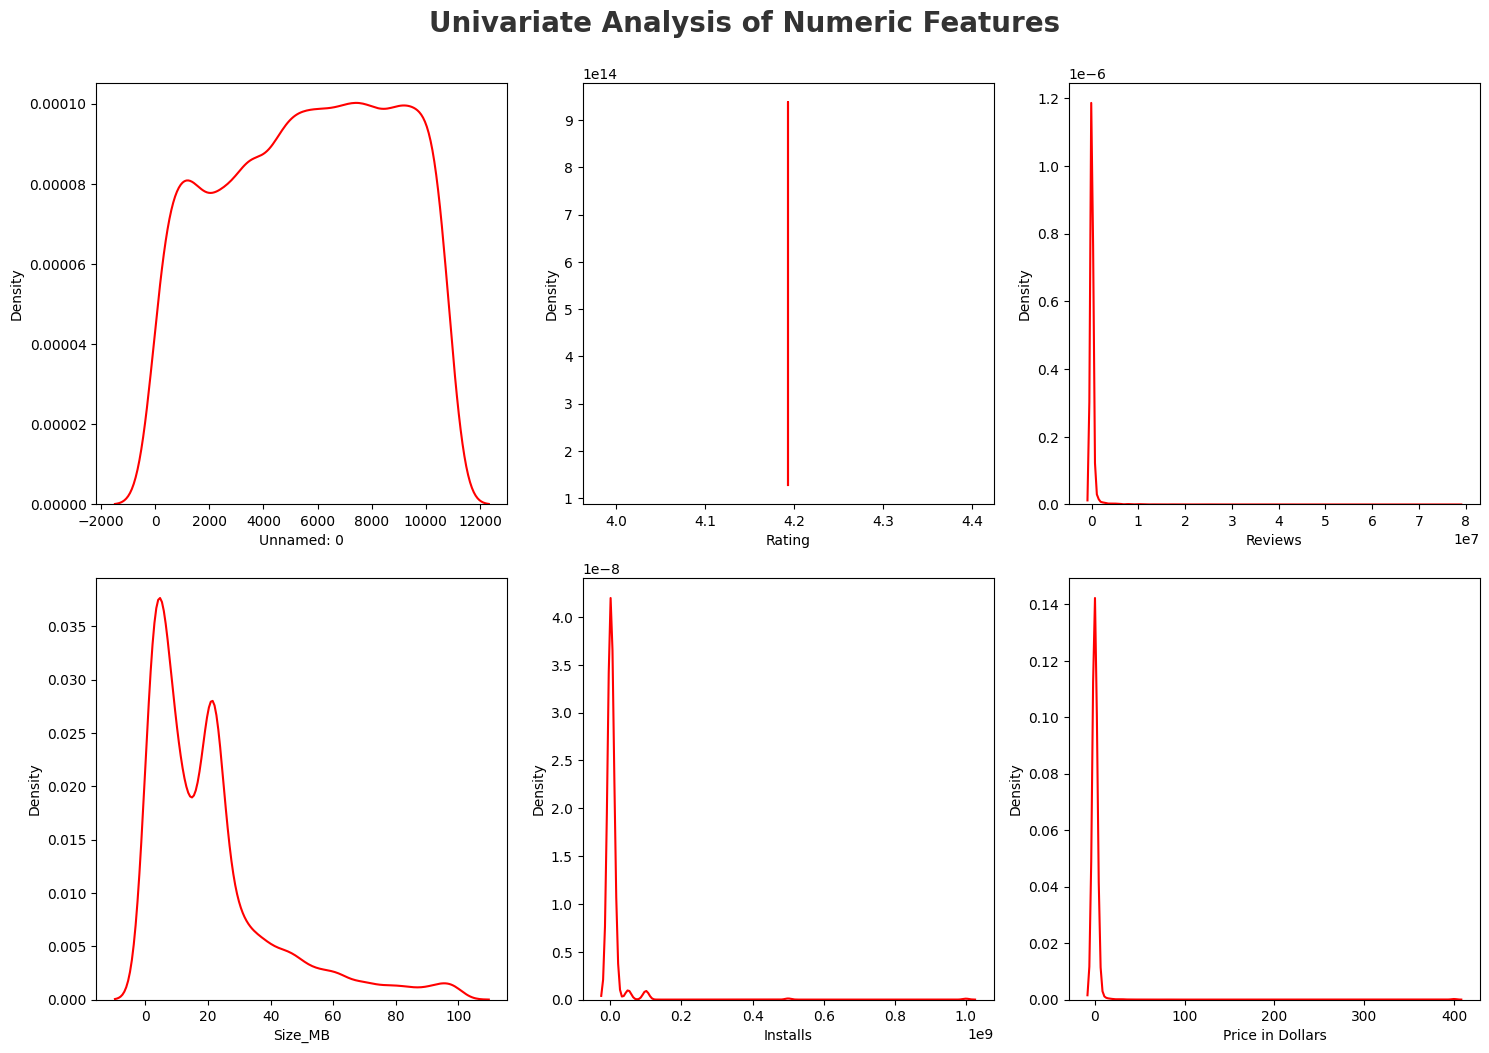

In [17]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Numeric Features',fontsize=20,fontweight = 'bold',alpha=0.8,y=1.)

for i in range(0,len(numeric_feature)):
    plt.subplot(3,3,i+1)
    sns.kdeplot(x=df[numeric_feature[i]], color = 'r')
    plt.xlabel(numeric_feature[i])
    plt.tight_layout()

<Axes: ylabel='count'>

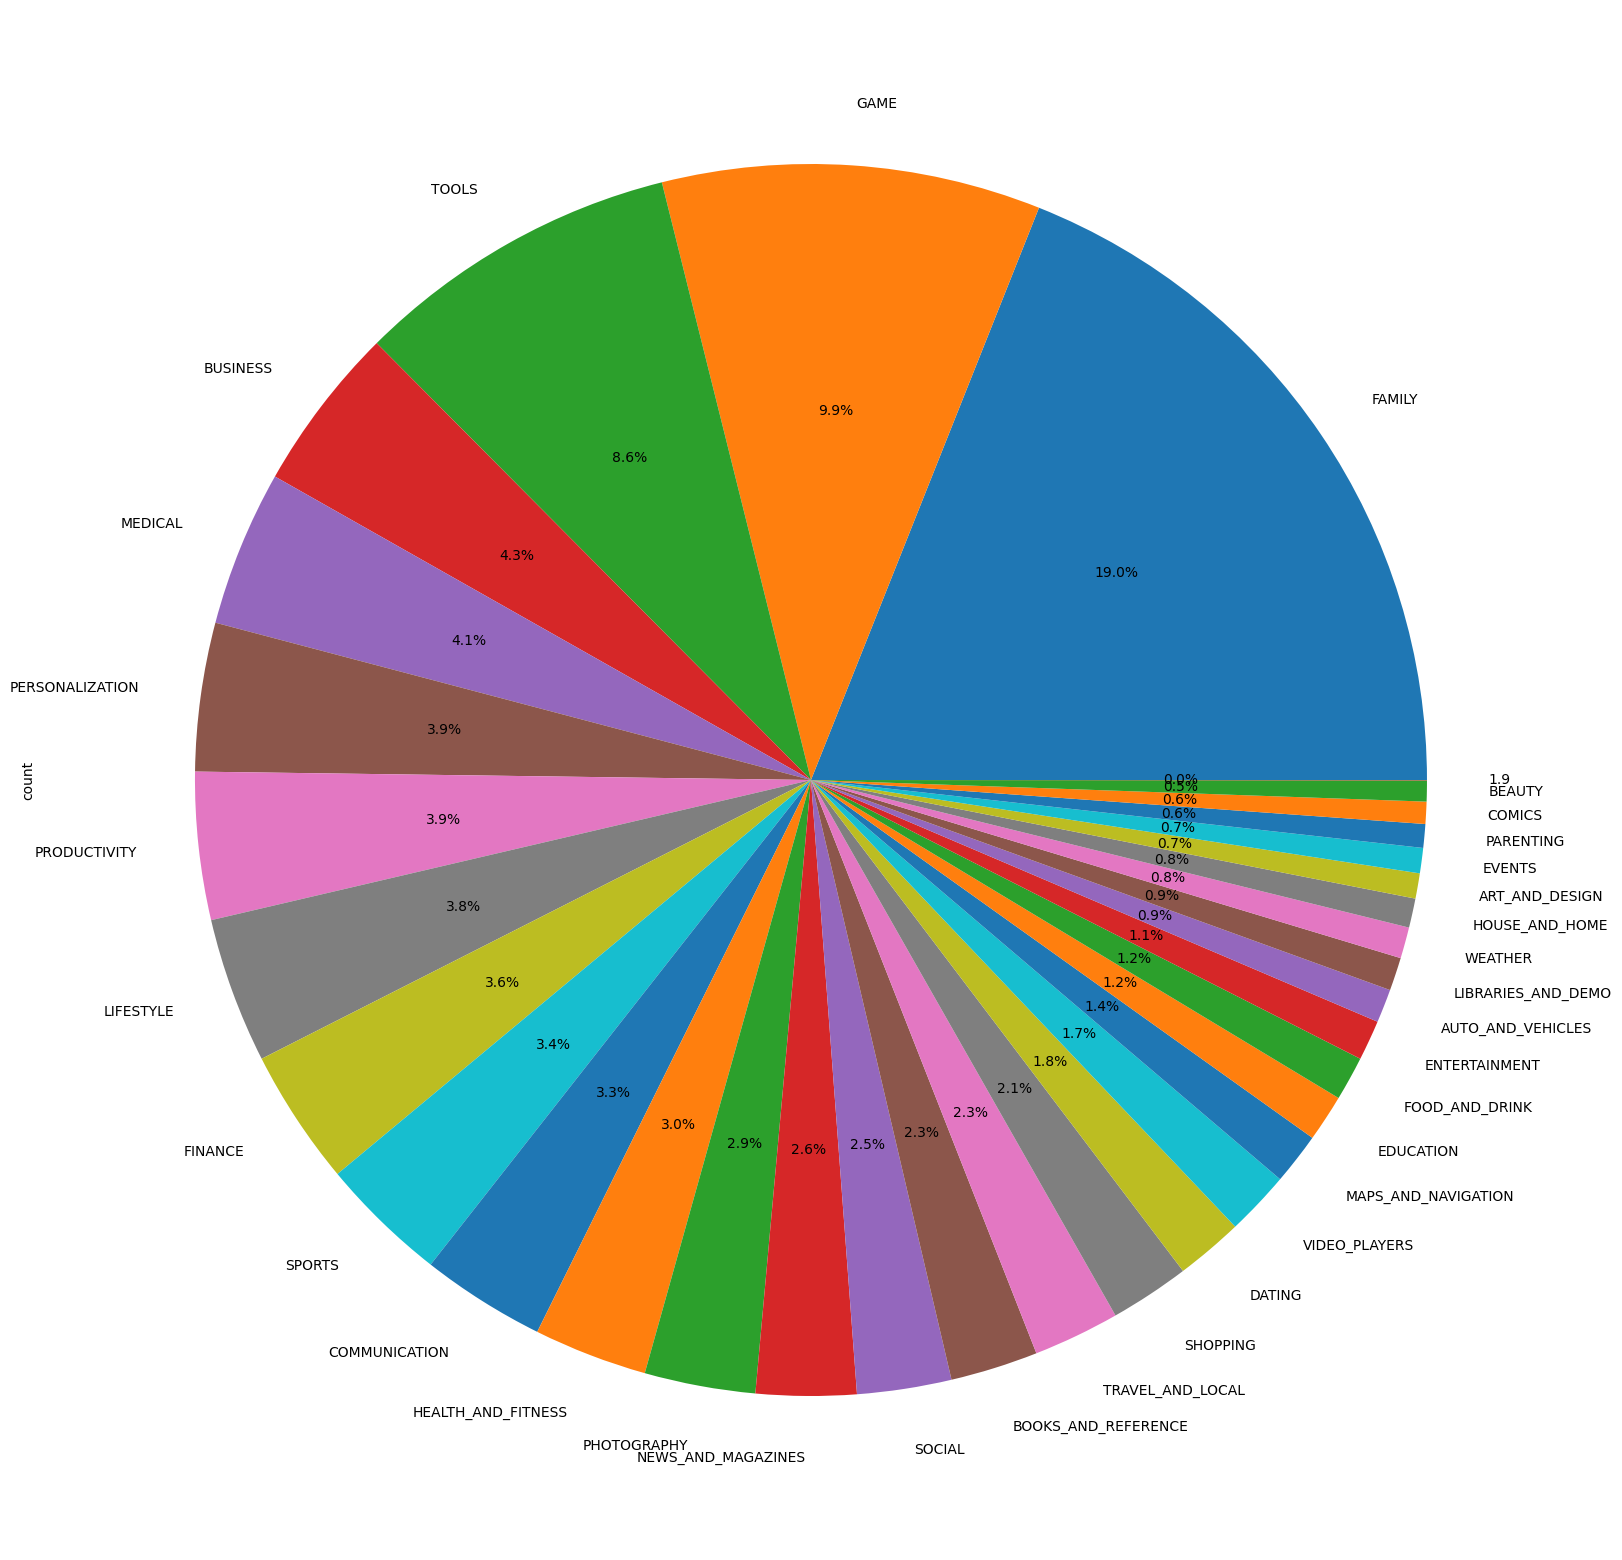

In [23]:
df['Category'].value_counts().plot.pie(y=df['Category'],figsize=(20,20),autopct = '%1.1f%%')

In [45]:
df = df[df['Category'] != '1.9']

<Axes: ylabel='count'>

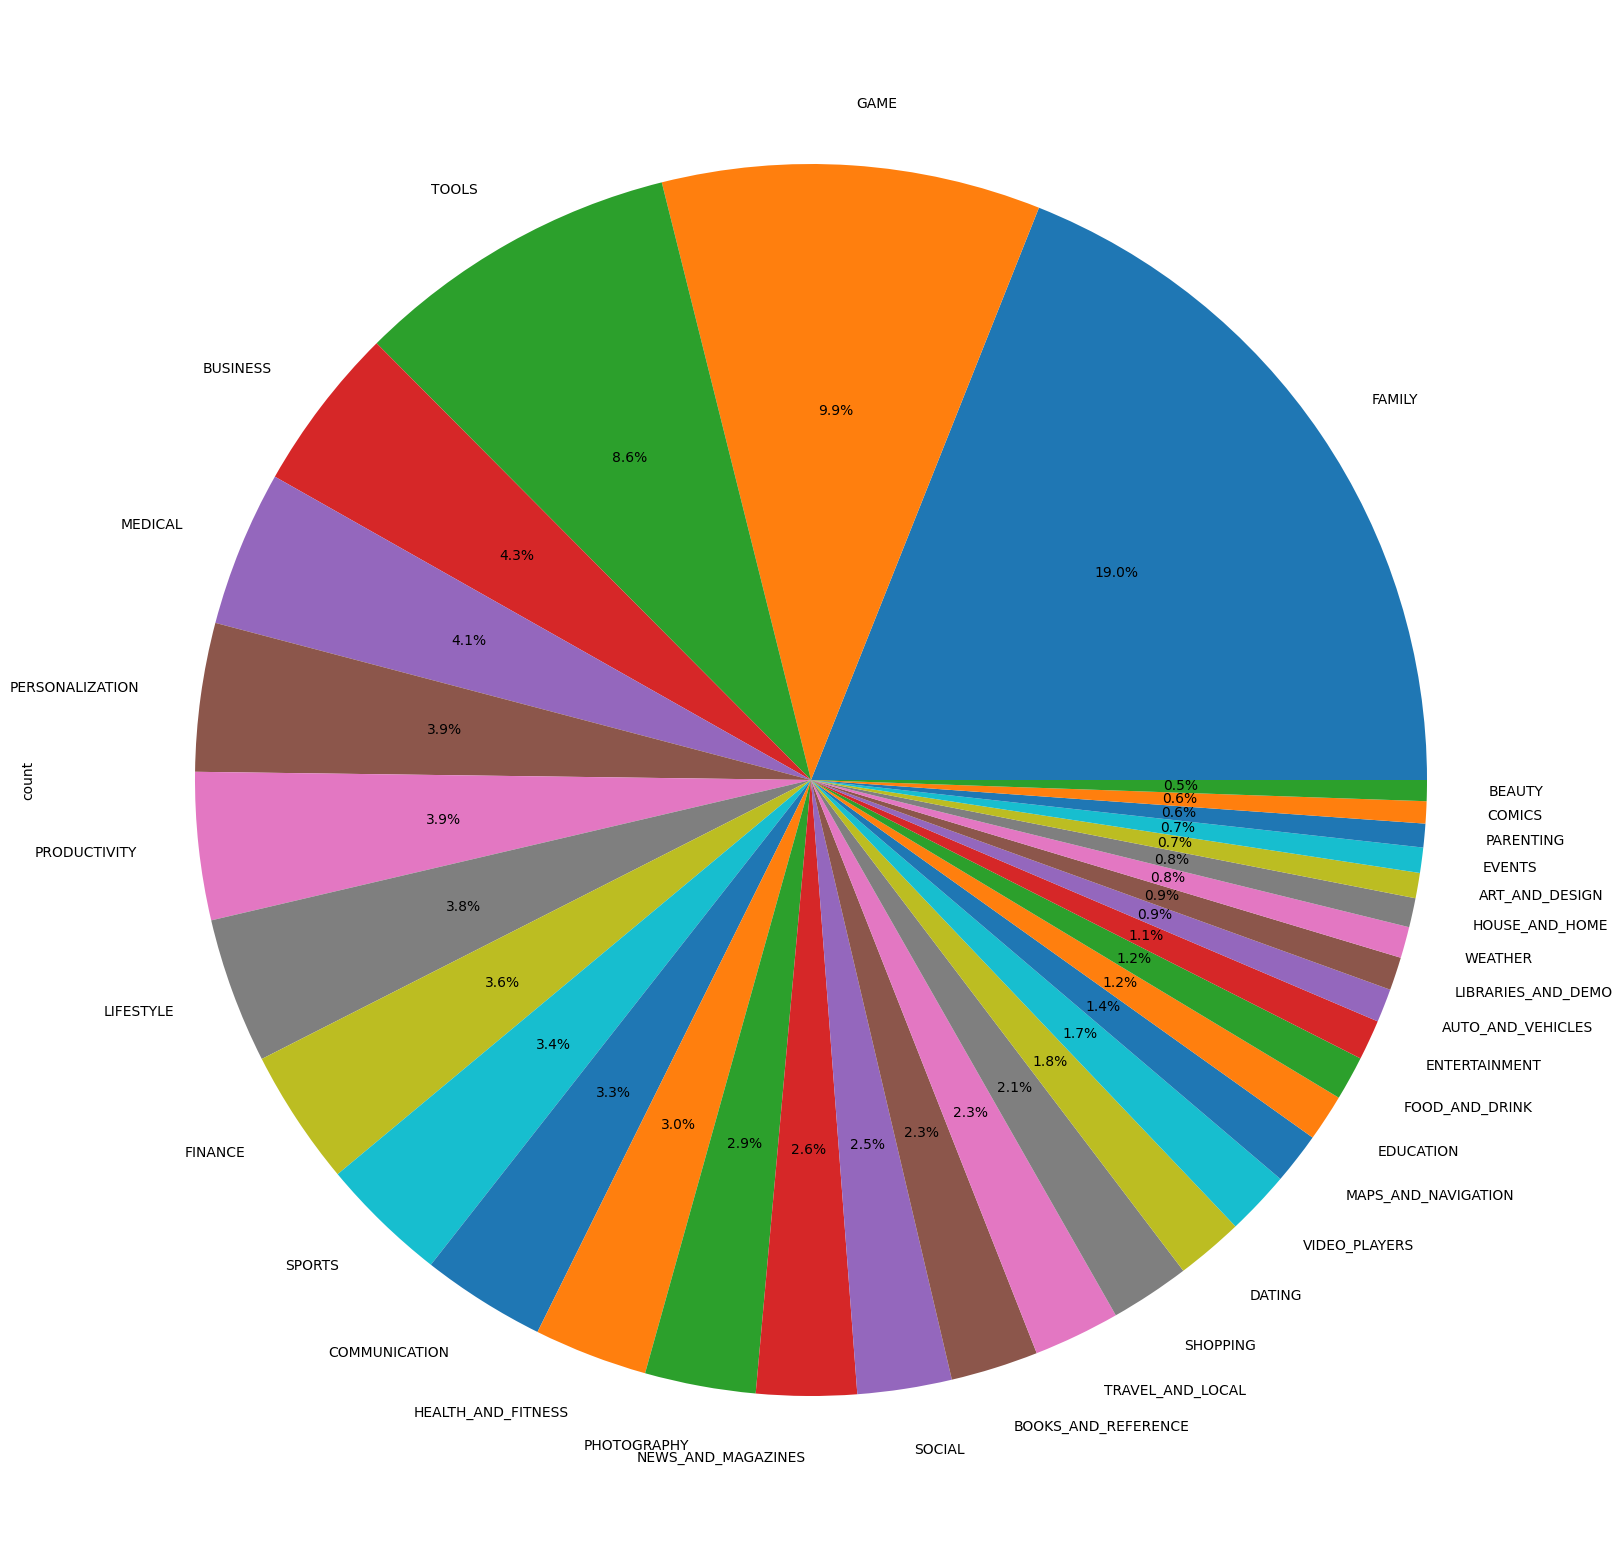

In [46]:
df['Category'].value_counts().plot.pie(y=df['Category'],figsize=(20,20),autopct = '%1.1f%%')

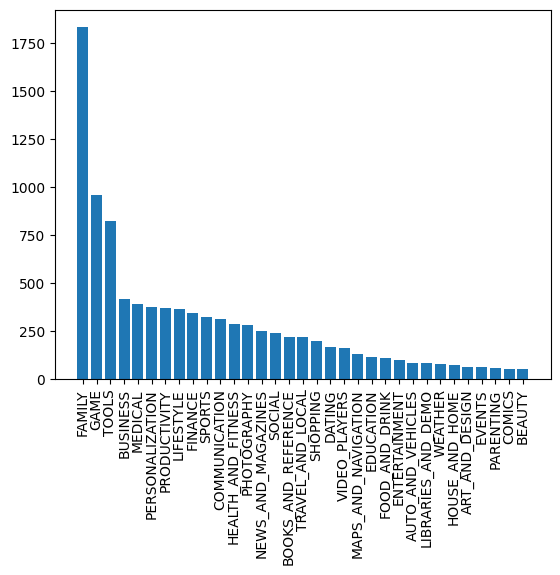

In [48]:
plt.bar(df['Category'].value_counts().index,df['Category'].value_counts().values)
plt.xticks(rotation = 90)
plt.show()

In [60]:
df.groupby('Category')['Installs'].sum()

Category
ART_AND_DESIGN           114338100
AUTO_AND_VEHICLES         53130211
BEAUTY                    27197050
BOOKS_AND_REFERENCE     1665969576
BUSINESS                 697164865
COMICS                    44981150
COMMUNICATION          11038276251
DATING                   140926107
EDUCATION                352952000
ENTERTAINMENT           2113660000
EVENTS                    15973161
FAMILY                  4427941505
FINANCE                  455348734
FOOD_AND_DRINK           211798751
GAME                   13878924415
HEALTH_AND_FITNESS      1144022512
HOUSE_AND_HOME            97212461
LIBRARIES_AND_DEMO        52995910
LIFESTYLE                503823539
MAPS_AND_NAVIGATION      503281890
MEDICAL                   38193177
NEWS_AND_MAGAZINES      2369217760
PARENTING                 31521110
PERSONALIZATION         1532494782
PHOTOGRAPHY             4649147655
PRODUCTIVITY            5793091369
SHOPPING                1400348785
SOCIAL                  5487867902
SPORTS     

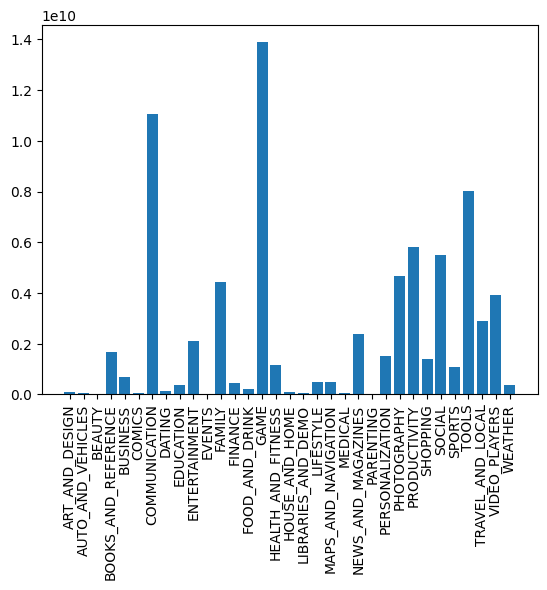

In [ ]:
category_installs = df.groupby('Category')['Installs'].sum()
plt.bar(category_installs.index,category_installs.values)
plt.xticks(rotation=90)
plt.show()